In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = sns.load_dataset('penguins')

In [76]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [78]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [79]:
df.corr()

<ipython-input-79-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<ipython-input-80-038fc9e360ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

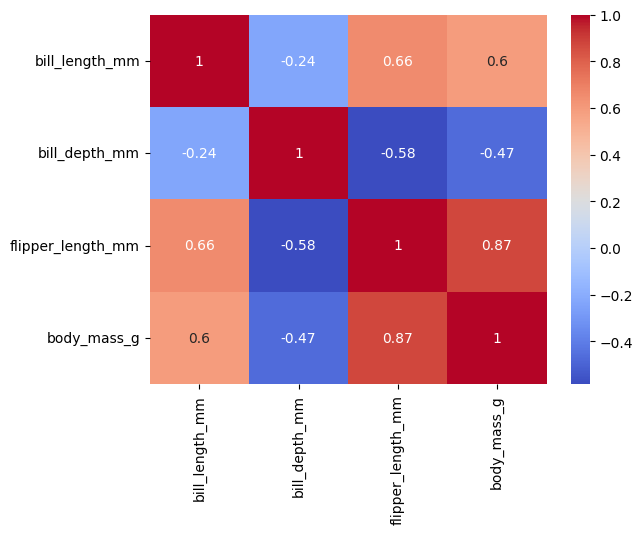

In [80]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [81]:
nan_percentage = df.isnull().sum() / df.count() * 100
nan_count = df.isnull().sum()

total_schema = pd.concat([nan_count, nan_percentage], axis=1)
total_schema.columns=['Count', 'Percentage']

total_schema

,Count,Percentage
species,0,0.000000
island,0,0.000000
bill_length_mm,2,0.584795
bill_depth_mm,2,0.584795
flipper_length_mm,2,0.584795
body_mass_g,2,0.584795
sex,11,3.303303


In [82]:
from sklearn.impute import SimpleImputer

In [83]:
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

In [84]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [85]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['sex'])

df['sex'].value_counts()

Male      179
Female    165
Name: sex, dtype: int64

In [88]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Male,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0


In [89]:
df['gender'].value_counts()

1    179
0    165
Name: gender, dtype: int64

In [90]:
df = df.drop(labels=['sex'], axis=1)

In [91]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0


In [94]:
species_count = df['species'].value_counts().reset_index()

<Axes: xlabel='index', ylabel='species'>

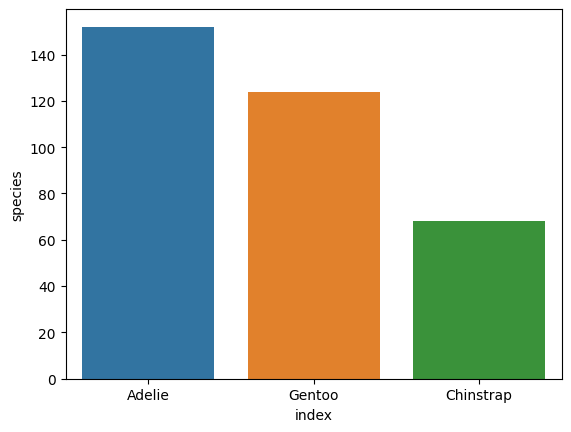

In [95]:
sns.barplot(data=species_count, x='index', y='species')

<Axes: xlabel='body_mass_g', ylabel='Density'>

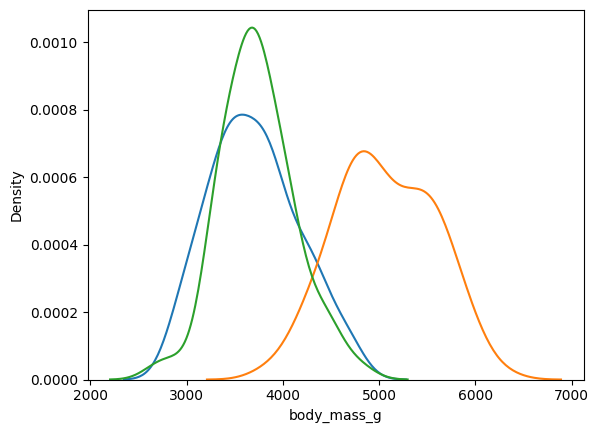

In [99]:
sns.kdeplot(df[df['species'] =='Adelie']['body_mass_g'])
sns.kdeplot(df[df['species'] =='Gentoo']['body_mass_g'])
sns.kdeplot(df[df['species'] =='Chinstrap']['body_mass_g'])

<ipython-input-103-83dbd452cee7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec]['body_mass_g'], shade=True, label=spec)
<ipython-input-103-83dbd452cee7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec]['body_mass_g'], shade=True, label=spec)
<ipython-input-103-83dbd452cee7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec]['body_mass_g'], shade=True, label=spec)


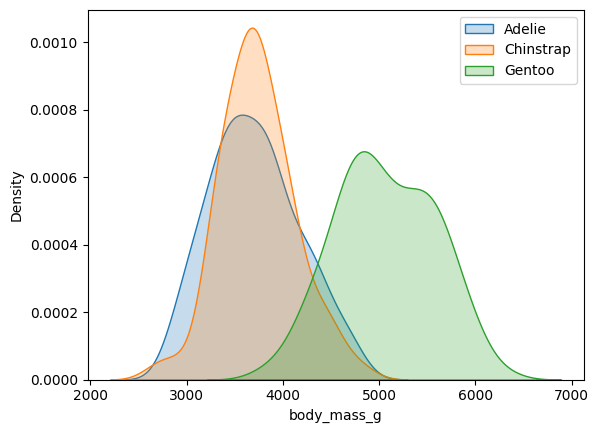

In [103]:
for spec in df['species'].unique():
  sns.kdeplot(df[df['species']== spec]['body_mass_g'], shade=True, label=spec)
  plt.legend()

In [104]:
for cols in df.columns[2:-1]:
  print(cols)

bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g


<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)


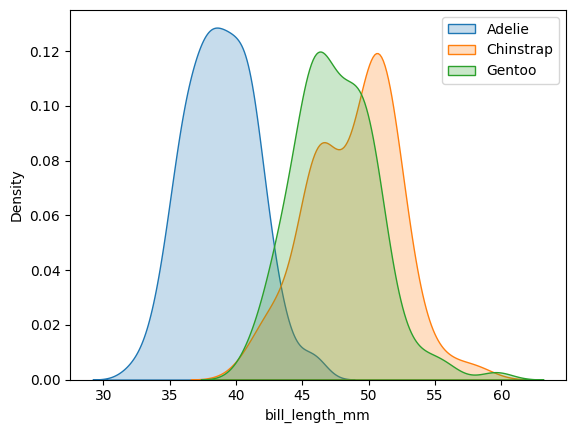

<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)


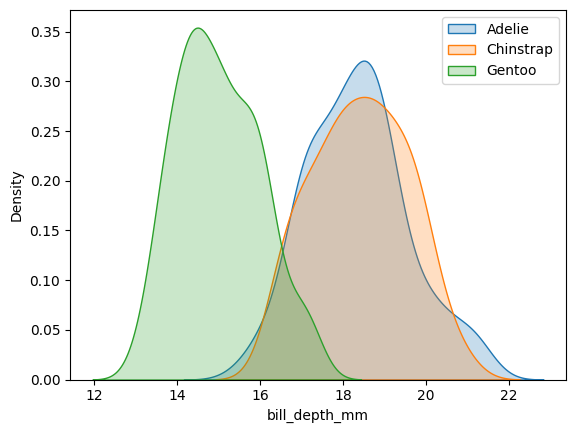

<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)


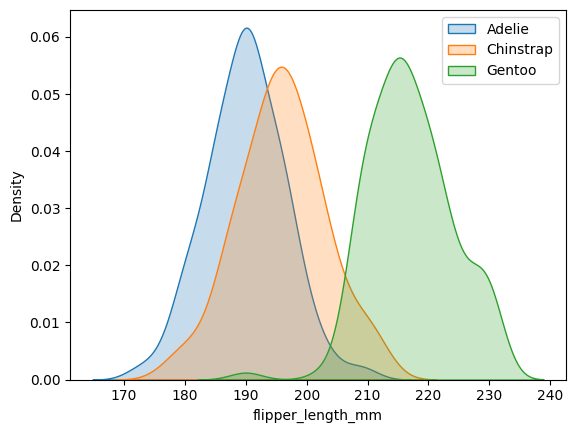

<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
<ipython-input-106-971d4922014d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)


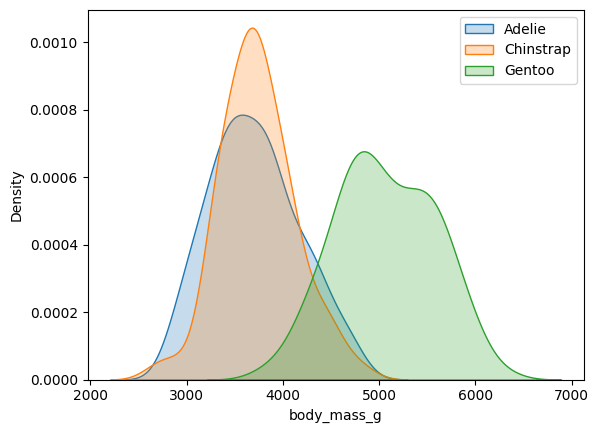

In [106]:
for cols in df.columns[2:-1]:
  for spec in df['species'].unique():
    sns.kdeplot(df[df['species']== spec][cols], shade=True, label=spec)
    plt.legend()
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


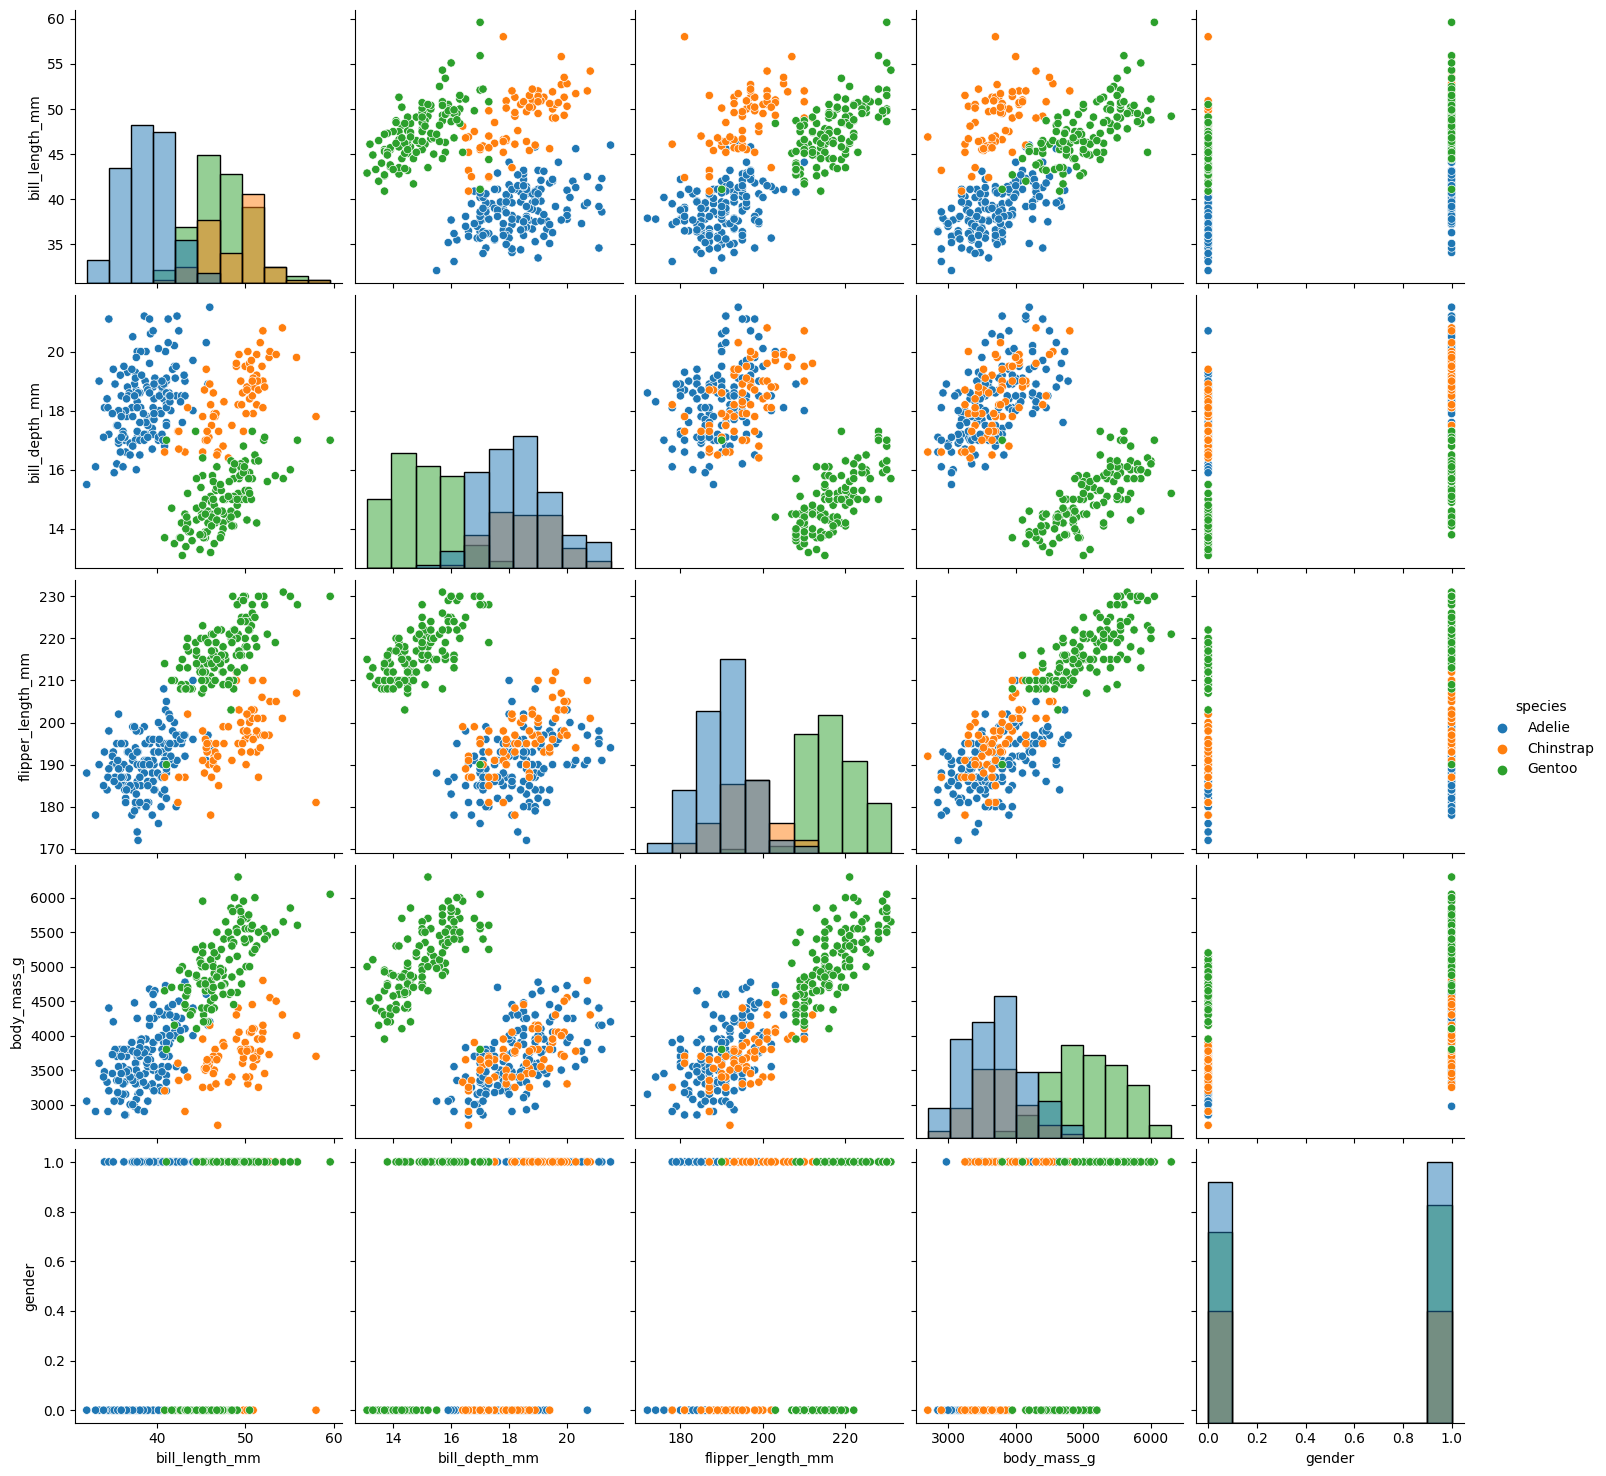

In [107]:
sns.pairplot(df, hue='species' ,size=3, diag_kind='hist' )